In [1]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import warnings
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import (
    accuracy_score,
    average_precision_score,
    recall_score,
    precision_score,
    f1_score,
    classification_report,
    PrecisionRecallDisplay,
    precision_recall_curve,
    roc_curve,
    roc_auc_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    make_scorer,
    fbeta_score
)

from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import auc
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from xgboost import XGBClassifier
warnings.filterwarnings("ignore")

## Exploratory Data Analysis

In [2]:
og_df = pd.read_csv('pokemon.csv')
og_df

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.50,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,"['Blaze', 'Solar Power']",0.50,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,5,80,65,80,fire,NaN,19.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,['Beast Boost'],0.25,1.0,0.5,2.0,0.5,1.0,2.0,0.5,1.0,...,NaN,797,107,101,61,steel,flying,999.9,7,1
797,['Beast Boost'],1.00,1.0,0.5,0.5,0.5,2.0,4.0,1.0,1.0,...,NaN,798,59,31,109,grass,steel,0.1,7,1
798,['Beast Boost'],2.00,0.5,2.0,0.5,4.0,2.0,0.5,1.0,0.5,...,NaN,799,97,53,43,dark,dragon,888.0,7,1
799,['Prism Armor'],2.00,2.0,1.0,1.0,1.0,0.5,1.0,1.0,2.0,...,NaN,800,127,89,79,psychic,NaN,230.0,7,1


In [3]:
og_df['type1'].unique()

array(['grass', 'fire', 'water', 'bug', 'normal', 'poison', 'electric',
       'ground', 'fairy', 'fighting', 'psychic', 'rock', 'ghost', 'ice',
       'dragon', 'dark', 'steel', 'flying'], dtype=object)

In [4]:
type_color_dict = {
    'grass': "#78C850",
    'fire': "#FF4422",
    'water': "#3399FF",
    'bug': "#A8B820",
    'normal': "#A8A878",
    'poison': "#A040A0",
    'electric': "#F8D030",
    'ground': "#E0C068",
    'fairy': "#EE99AC",
    'fighting': "#C03028",
    'psychic': "#F85888",
    'rock': "#8A7E46FF",
    'ghost': "#705898",
    'ice': "#98D8D8",
    'dragon': "#7038F8",
    'dark': "#705848",
    'steel': "#B8B8D0",
    'flying': "#A890F0"
}

In [5]:
og_df.describe()

,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,...,height_m,hp,percentage_male,pokedex_number,sp_attack,sp_defense,speed,weight_kg,generation,is_legendary
count,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,...,781.000000,801.000000,703.000000,801.000000,801.000000,801.000000,801.000000,781.000000,801.000000,801.000000
mean,0.996255,1.057116,0.968789,1.073970,1.068976,1.065543,1.135456,1.192884,0.985019,1.034020,...,1.163892,68.958801,55.155761,401.000000,71.305868,70.911361,66.334582,61.378105,3.690387,0.087391
std,0.597248,0.438142,0.353058,0.654962,0.522167,0.717251,0.691853,0.604488,0.558256,0.788896,...,1.080326,26.576015,20.261623,231.373075,32.353826,27.942501,28.907662,109.354766,1.930420,0.282583
min,0.250000,0.250000,0.000000,0.000000,0.250000,0.000000,0.250000,0.250000,0.000000,0.250000,...,0.100000,1.000000,0.000000,1.000000,10.000000,20.000000,5.000000,0.100000,1.000000,0.000000
25%,0.500000,1.000000,1.000000,0.500000,1.000000,0.500000,0.500000,1.000000,1.000000,0.500000,...,0.600000,50.000000,50.000000,201.000000,45.000000,50.000000,45.000000,9.000000,2.000000,0.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,65.000000,50.000000,401.000000,65.000000,66.000000,65.000000,27.300000,4.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,...,1.500000,80.000000,50.000000,601.000000,91.000000,90.000000,85.000000,64.800000,5.000000,0.000000
max,4.000000,4.000000,2.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,14.500000,255.000000,100.000000,801.000000,194.000000,230.000000,180.000000,999.900000,7.000000,1.000000


In [6]:
# Check for non-numeric values in 'capture_rate'
non_numeric_idx = []
for i, val in enumerate(og_df['capture_rate']):
    try:
        float(val)
    except ValueError:
        non_numeric_idx.append(i)
        print(f"Non-numeric value found: \"{val}\" in row {i}")

Non-numeric value found: "30 (Meteorite)255 (Core)" in row 773


In [7]:
# Handle Minior forms
minior_idx = non_numeric_idx[0]

# Create a copy for Minior (Meteorite)
minior_meteorite = og_df.loc[minior_idx].copy()
minior_meteorite['name'] = 'Minior (Meteorite)'
minior_meteorite['capture_rate'] = 30

# Update original to Minior (Core)
og_df.loc[minior_idx, 'name'] = 'Minior (Core)'
og_df.loc[minior_idx, 'capture_rate'] = 255

# Add the new row to the dataframe
og_df = pd.concat([og_df, minior_meteorite.to_frame().T], ignore_index=True)

In [8]:
# Find columns with missing values
cols_with_na = og_df.columns[og_df.isna().any()].tolist()
for attr in cols_with_na:
    print(f"Missing values in column '{attr}':")
    print(og_df[og_df[attr].isna()]['name'].tolist())

Missing values in column 'height_m':
['Rattata', 'Raticate', 'Raichu', 'Sandshrew', 'Sandslash', 'Vulpix', 'Ninetales', 'Diglett', 'Dugtrio', 'Meowth', 'Persian', 'Geodude', 'Graveler', 'Golem', 'Grimer', 'Muk', 'Exeggutor', 'Marowak', 'Hoopa', 'Lycanroc']
Missing values in column 'percentage_male':
['Magnemite', 'Magneton', 'Voltorb', 'Electrode', 'Staryu', 'Starmie', 'Ditto', 'Porygon', 'Articuno', 'Zapdos', 'Moltres', 'Mewtwo', 'Mew', 'Unown', 'Porygon2', 'Raikou', 'Entei', 'Suicune', 'Lugia', 'Ho-Oh', 'Celebi', 'Shedinja', 'Lunatone', 'Solrock', 'Baltoy', 'Claydol', 'Beldum', 'Metang', 'Metagross', 'Regirock', 'Regice', 'Registeel', 'Kyogre', 'Groudon', 'Rayquaza', 'Jirachi', 'Deoxys', 'Bronzor', 'Bronzong', 'Magnezone', 'Porygon-Z', 'Rotom', 'Uxie', 'Mesprit', 'Azelf', 'Dialga', 'Palkia', 'Regigigas', 'Giratina', 'Phione', 'Manaphy', 'Darkrai', 'Shaymin', 'Arceus', 'Victini', 'Klink', 'Klang', 'Klinklang', 'Cryogonal', 'Golett', 'Golurk', 'Cobalion', 'Terrakion', 'Virizion', 'Resh

In [9]:
# Fill height and weight missing values with real values

og_df.loc[og_df['name'] == 'Rattata', 'height_m'] = 0.3
og_df.loc[og_df['name'] == 'Rattata', 'weight_kg'] = 3.5

og_df.loc[og_df['name'] == 'Raticate', 'height_m'] = 0.7
og_df.loc[og_df['name'] == 'Raticate', 'weight_kg'] = 18.5

og_df.loc[og_df['name'] == 'Raichu', 'height_m'] = 0.8
og_df.loc[og_df['name'] == 'Raichu', 'weight_kg'] = 30

og_df.loc[og_df['name'] == 'Sandshrew', 'height_m'] = 0.6
og_df.loc[og_df['name'] == 'Sandshrew', 'weight_kg'] = 12

og_df.loc[og_df['name'] == 'Sandslash', 'height_m'] = 1
og_df.loc[og_df['name'] == 'Sandslash', 'weight_kg'] = 29.5

og_df.loc[og_df['name'] == 'Vulpix', 'height_m'] = 0.6
og_df.loc[og_df['name'] == 'Vulpix', 'weight_kg'] = 9.9

og_df.loc[og_df['name'] == 'Ninetales', 'height_m'] = 1.1
og_df.loc[og_df['name'] == 'Ninetales', 'weight_kg'] = 19.9

og_df.loc[og_df['name'] == 'Diglett', 'height_m'] = 0.2
og_df.loc[og_df['name'] == 'Diglett', 'weight_kg'] = 0.8

og_df.loc[og_df['name'] == 'Dugtrio', 'height_m'] = 0.7
og_df.loc[og_df['name'] == 'Dugtrio', 'weight_kg'] = 33.3

og_df.loc[og_df['name'] == 'Meowth', 'height_m'] = 0.4
og_df.loc[og_df['name'] == 'Meowth', 'weight_kg'] = 4.2

og_df.loc[og_df['name'] == 'Persian', 'height_m'] = 1
og_df.loc[og_df['name'] == 'Persian', 'weight_kg'] = 32

og_df.loc[og_df['name'] == 'Geodude', 'height_m'] = 0.4
og_df.loc[og_df['name'] == 'Geodude', 'weight_kg'] = 20

og_df.loc[og_df['name'] == 'Graveler', 'height_m'] = 1
og_df.loc[og_df['name'] == 'Graveler', 'weight_kg'] = 105

og_df.loc[og_df['name'] == 'Golem', 'height_m'] = 1.4
og_df.loc[og_df['name'] == 'Golem', 'weight_kg'] = 300

og_df.loc[og_df['name'] == 'Grimer', 'height_m'] = 0.9
og_df.loc[og_df['name'] == 'Grimer', 'weight_kg'] = 30

og_df.loc[og_df['name'] == 'Muk', 'height_m'] = 1.2
og_df.loc[og_df['name'] == 'Muk', 'weight_kg'] = 30

og_df.loc[og_df['name'] == 'Exeggutor', 'height_m'] = 2
og_df.loc[og_df['name'] == 'Exeggutor', 'weight_kg'] = 120

og_df.loc[og_df['name'] == 'Marowak', 'height_m'] = 1
og_df.loc[og_df['name'] == 'Marowak', 'weight_kg'] = 45

og_df.loc[og_df['name'] == 'Hoopa', 'height_m'] = 6.5
og_df.loc[og_df['name'] == 'Hoopa', 'weight_kg'] = 490

og_df.loc[og_df['name'] == 'Lycanroc', 'height_m'] = 1.1
og_df.loc[og_df['name'] == 'Lycanroc', 'weight_kg'] = 25

In [10]:
# Handle sexless pokemon
# og_df['percentage_male'] = pd.to_numeric(og_df['percentage_male'], errors='coerce')

# make column indicating if pokemon has gender with values 1 if it one and 0 if not
og_df["has_sex"] = og_df['percentage_male'].apply(lambda x: 0 if pd.isna(x) else 1)
og_df['percentage_male'] = og_df['percentage_male'].fillna(0)

# Check if all NaNs are gone
cols_with_na = og_df.columns[og_df.isna().any()].tolist()
cols_with_na

['type2']

In [11]:
# Remove name, japanese name, classification, abilities and type match-up attributes
df = og_df.copy()
for attr in og_df.columns:
    if attr in ['name', 'japanese_name', 'classfication', 'abilities', 'pokedex_number'] or attr.startswith('against_'): 
        df = df.drop(columns=[attr])

In [12]:
# Make attributes numerical
for attr in df.columns:
    if attr not in ['type1', 'type2']:
        df[attr] = pd.to_numeric(df[attr])

df

,attack,base_egg_steps,base_happiness,base_total,capture_rate,defense,experience_growth,height_m,hp,percentage_male,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary,has_sex
0,49,5120,70,318,45,49,1059860,0.7,45,88.1,65,65,45,grass,poison,6.9,1,0,1
1,62,5120,70,405,45,63,1059860,1.0,60,88.1,80,80,60,grass,poison,13.0,1,0,1
2,100,5120,70,625,45,123,1059860,2.0,80,88.1,122,120,80,grass,poison,100.0,1,0,1
3,52,5120,70,309,45,43,1059860,0.6,39,88.1,60,50,65,fire,NaN,8.5,1,0,1
4,64,5120,70,405,45,58,1059860,1.1,58,88.1,80,65,80,fire,NaN,19.0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
797,181,30720,0,570,255,131,1250000,0.3,59,0.0,59,31,109,grass,steel,0.1,7,1,0
798,101,30720,0,570,15,53,1250000,5.5,223,0.0,97,53,43,dark,dragon,888.0,7,1,0
799,107,30720,0,600,3,101,1250000,2.4,97,0.0,127,89,79,psychic,NaN,230.0,7,1,0
800,95,30720,0,600,3,115,1250000,1.0,80,0.0,130,115,65,steel,fairy,80.5,7,1,0


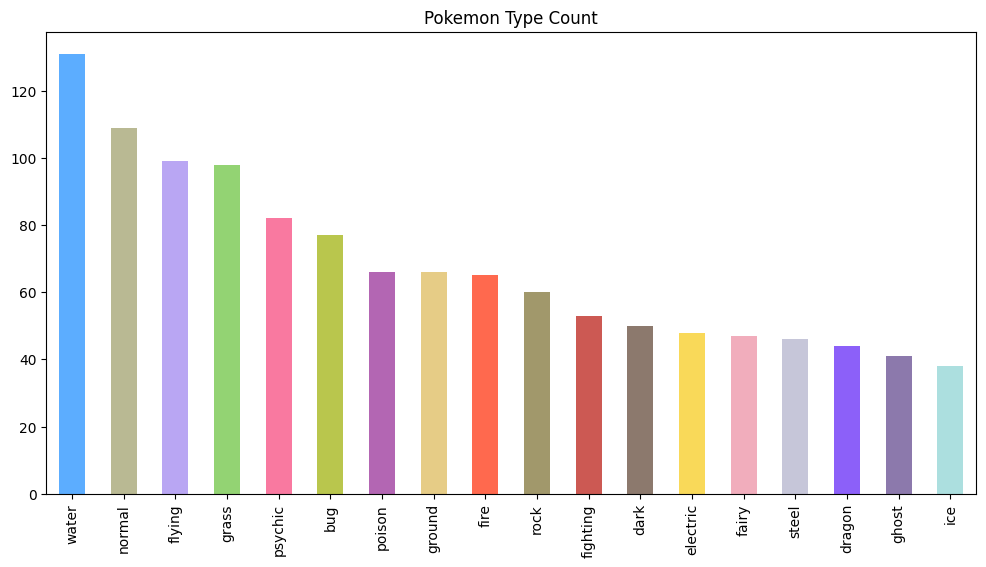

In [13]:
# histogram of each type1 and type2
type1_counts = df['type1'].value_counts()
type2_counts = df['type2'].value_counts()
type_counts = type1_counts.add(type2_counts, fill_value=0).sort_values(ascending=False)

plt.figure(figsize=(12, 6))
type_counts.plot(kind='bar', color=[type_color_dict[t] for t in type_counts.index], alpha=0.8)
plt.title('Pokemon Type Count')
plt.show()

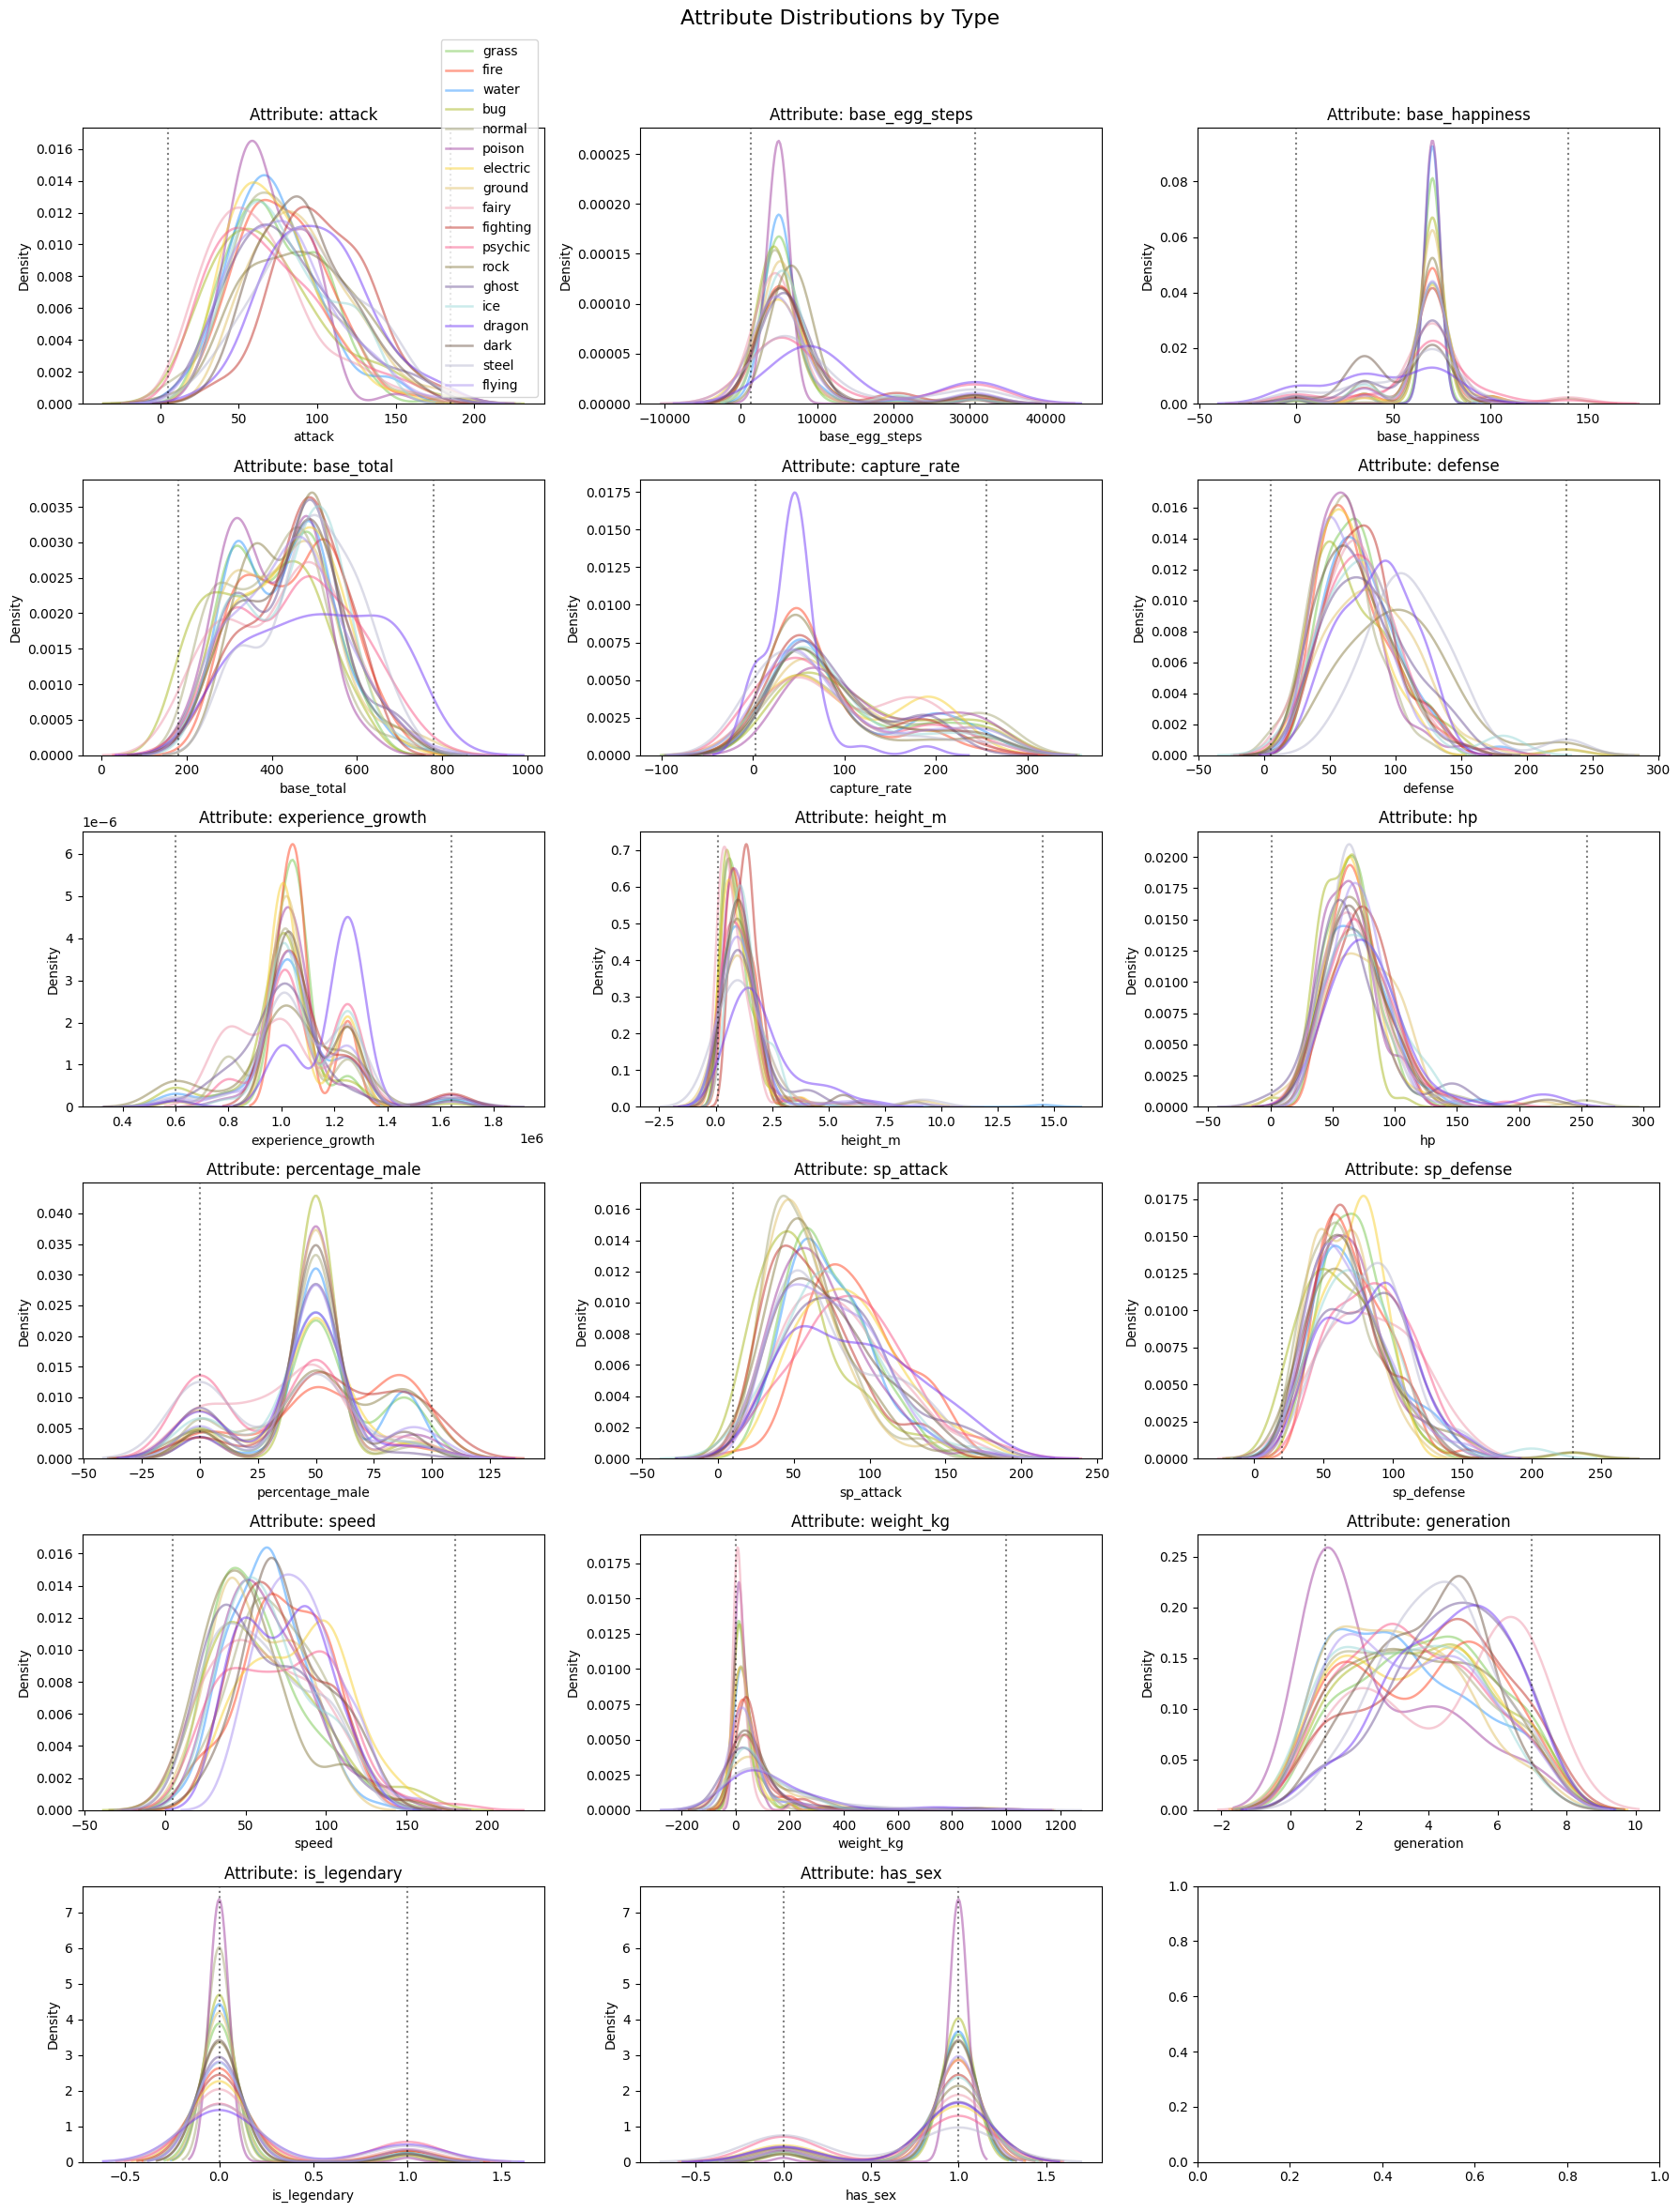

In [14]:
fig, axes = plt.subplots(6, 3, figsize=(18, 24))
axes = axes.flatten()

attributes = [col for col in df if col not in ['type1', 'type2']]

for i, attr in enumerate(attributes):
    # Get min and max value for current attribute
    max_val = df[attr].max()
    min_val = df[attr].min()
    
    # Plot KDE for each type1
    for t in df['type1'].unique():
        # donem igual importancia al tipus 1 que al 2
        subset1 = df[df['type1'] == t][attr]
        subset2 = df[df['type2'] == t][attr]
        subset = pd.concat([subset1, subset2])
        sns.kdeplot(subset, ax=axes[i], label=t, color=type_color_dict[t], fill=False, alpha=0.5, linewidth=1.8)
    
    # Plot min and max values
    axes[i].axvline(min_val, color='black', linestyle=':', alpha=0.5, linewidth=1.5)
    axes[i].axvline(max_val, color='black', linestyle=':', alpha=0.5, linewidth=1.5)

    axes[i].set_title(f'Attribute: {attr}')
    if i == 0:
        axes[i].legend()

fig.suptitle('Attribute Distributions by Type', fontsize=16)
plt.tight_layout()
plt.show()

- Auc-roc mitjà
- Accuracy
- Classification report de scikitlearn
- Matriu de confusió

In [15]:
# make one-hot array for types
types = df['type1'].unique().tolist()
for t in types:
    df[f"is_{t}"] = 0
    df.loc[(df['type1'] == t) | (df['type2'] == t), f"is_{t}"] = 1

df = df.drop(columns=["type1", "type2"])
df

,attack,base_egg_steps,base_happiness,base_total,capture_rate,defense,experience_growth,height_m,hp,percentage_male,...,is_fairy,is_fighting,is_psychic,is_rock,is_ghost,is_ice,is_dragon,is_dark,is_steel,is_flying
0,49,5120,70,318,45,49,1059860,0.7,45,88.1,...,0,0,0,0,0,0,0,0,0,0
1,62,5120,70,405,45,63,1059860,1.0,60,88.1,...,0,0,0,0,0,0,0,0,0,0
2,100,5120,70,625,45,123,1059860,2.0,80,88.1,...,0,0,0,0,0,0,0,0,0,0
3,52,5120,70,309,45,43,1059860,0.6,39,88.1,...,0,0,0,0,0,0,0,0,0,0
4,64,5120,70,405,45,58,1059860,1.1,58,88.1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
797,181,30720,0,570,255,131,1250000,0.3,59,0.0,...,0,0,0,0,0,0,0,0,1,0
798,101,30720,0,570,15,53,1250000,5.5,223,0.0,...,0,0,0,0,0,0,1,1,0,0
799,107,30720,0,600,3,101,1250000,2.4,97,0.0,...,0,0,1,0,0,0,0,0,0,0
800,95,30720,0,600,3,115,1250000,1.0,80,0.0,...,1,0,0,0,0,0,0,0,1,0


In [16]:
def z_score_all_but_targets(df: pd.DataFrame) -> pd.DataFrame:
    # normalize all columns except target columns (the ones that start with "is_")
    df_new = df.copy()
    cols = df.columns.tolist()
    for col in cols:
        if not col.startswith("is_") and col != "has_sex":
            mean = df_new[col].mean()
            std = df_new[col].std()
            df_new[col] = (df_new[col] - mean) / std
    return df_new

In [17]:
df = z_score_all_but_targets(df)
df

,attack,base_egg_steps,base_happiness,base_total,capture_rate,defense,experience_growth,height_m,hp,percentage_male,...,is_fairy,is_fighting,is_psychic,is_rock,is_ghost,is_ice,is_dragon,is_dark,is_steel,is_flying
0,-0.898503,-0.315833,0.236487,-0.927073,-0.705100,-0.780159,0.030333,-0.425766,-0.901598,1.514045,...,0,0,0,0,0,0,0,0,0,0
1,-0.494126,-0.315833,0.236487,-0.196938,-0.705100,-0.324924,0.030333,-0.149500,-0.336867,1.514045,...,0,0,0,0,0,0,0,0,0,0
2,0.687898,-0.315833,0.236487,1.649381,-0.705100,1.626081,0.030333,0.771385,0.416108,1.514045,...,0,0,0,0,0,0,0,0,0,0
3,-0.805185,-0.315833,0.236487,-1.002605,-0.705100,-0.975259,0.030333,-0.517854,-1.127491,1.514045,...,0,0,0,0,0,0,0,0,0,0
4,-0.431914,-0.315833,0.236487,-0.196938,-0.705100,-0.487508,0.030333,-0.057412,-0.412165,1.514045,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
797,3.207475,3.590069,-3.337240,1.187802,2.043557,1.886215,1.217552,-0.794120,-0.374516,-1.841380,...,0,0,0,0,0,0,0,0,1,0
798,0.719004,3.590069,-3.337240,1.187802,-1.097766,-0.650092,1.217552,3.994483,5.799880,-1.841380,...,0,0,0,0,0,0,1,1,0,0
799,0.905639,3.590069,-3.337240,1.439572,-1.254832,0.910712,1.217552,1.139739,1.056137,-1.841380,...,0,0,1,0,0,0,0,0,0,0
800,0.532368,3.590069,-3.337240,1.439572,-1.254832,1.365947,1.217552,-0.149500,0.416108,-1.841380,...,1,0,0,0,0,0,0,0,1,0


In [18]:
X = df.drop(columns=[f"is_{_type}" for _type in types])
Y = df[[f"is_{_type}" for _type in types]]

In [19]:
# al general no posem stratify perque no es binari el target
test_split = 0.2
X_train_full, X_test, Y_train_full, Y_test = train_test_split(X, Y, test_size=test_split, random_state=1, shuffle=False)

In [20]:
def split_Y(Y, target): 
    return Y[f"is_{target}"]

Pel `parameter_grid` hem probat els seguents models: Logistic regresion, random forest, gradient boosting (tant el de sklearn com el de xgboost), SVM, KNN, ridge, gnb, bnb i mlp. Pero observant els resultats hem deixat a `parameter_grid` unicament SVM, ridge, gnb i bnb.

In [21]:
# new parameter grids for the rest of types
parameter_grids = {
    'SVM': (
        SVC(probability=True), {
            'C': [0.1, 0.5, 1, 5, 10],
            'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],    
            'gamma': ['scale', 0.001, 0.01, 0.1], 
            'class_weight': ['balanced'] 
        }
    ),
    'RIDGE': (
        RidgeClassifier(), {
            'alpha': [0.5, 1.0, 2.0, 5.0],
            'class_weight': ['balanced']
        }
    ),
    'GNB': (GaussianNB(), {}),
    'LR': (
        LogisticRegression(max_iter=1000), {
            'C': [0.1, 0.5, 1, 5, 10],
            'penalty': ['l2', 'l1'],
            'solver': ['lbfgs', 'saga'],
            'class_weight': ['balanced']
        }
    ),
}

Aqui guardarem els resultats dels millors models per cada tipus.

In [22]:
tolerancia = 0.15  
 
model_by_type = {}
threshold_by_type = {}
train_scores = {}
test_scores = {}
types_wout_model = []

In [23]:
fbeta_scorer = make_scorer(fbeta_score, beta=2)

def best_threshold(model, X_val, y_val):
    probs = model.predict_proba(X_val)[:, 1]
    best_thr = 0.5
    best_score = 0

    for thr in np.linspace(0, 1, 101):
        preds = (probs >= thr).astype(int)

        if np.sum(preds) == 0:
            continue

        score = fbeta_score(y_val, preds, beta=2)
        if score > best_score:
            best_score = score
            best_thr = thr
    
    return best_thr

Codi principal per trobar el millor model per cada tipus. 

Es basa en GridSearch per trobar els millors paràmetres per cada model i a partir d'aquests es tria el que te millor valor mitjà de f2-score a test sempre que la diferència entre els scores de train i test no superi la tolarància definida per `tol = 0.2*f2_train` que depen del score a train de manera que si aquest valor augmenta, la tolerància pot variar més. Si la diferència supera la tolerància, aleshores la comparem amb la que hem definit com `tolerancia` que és un valor llindar amb el que trobem encara acceptable que sobrepassi la tolerància. Si tot i això encara queda algun model sense cumplir cap de les dues condicions, triem el que tingui menor diferència entre scores i el marquem com a millorable.

Seguidament, com que la majoria de models que utilitzem son probabilistics i les nostres dades son molt desbalensejades, amb les dades de validació trobem un millor threshold per cada tipus.

In [24]:
from sklearn.calibration import CalibratedClassifierCV

for i, t in enumerate(types):
    print(f"\n=== ({i+1}) TYPE: {t} ===")

    y_full = split_Y(Y_train_full, target=t)
    X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_full, test_size=test_split, random_state=1, stratify=y_full)

    candidates = [] # llista de diccionaris per cada model amb la informació necessaria d'aquest

    # Busquem el millor model segons F2 i tolerància
    for model_name, (model, param_grid) in parameter_grids.items():
        grid_search = GridSearchCV(
            model,
            param_grid,
            cv=5,
            scoring=fbeta_scorer,
            n_jobs=-1,
            refit=True,
            return_train_score=True,
            verbose=0
        )
        
        grid_search.fit(X_train, y_train)
        candidate_model = grid_search.best_estimator_

        pred_val = candidate_model.predict(X_val)
        pred_train = candidate_model.predict(X_train)
        f2_val = fbeta_score(y_val, pred_val, beta=2)
        f2_train = fbeta_score(y_train, pred_train, beta=2)
        diff = abs(f2_train - f2_val)

        candidates.append({
            "model_name": model_name,
            "model": candidate_model,
            "params": grid_search.best_params_,
            "f2_val": f2_val,
            "f2_train": f2_train,
            "gap": diff,
            "tol": 0.15 * f2_train
        })

        print(f"{model_name}: train={f2_train:.4f}, val={f2_val:.4f}, gap={diff:.4f}, tol={0.15 * f2_train:.4f}")

    # === FILTRE PER TOLERÀNCIA ===
    valid_models = [m for m in candidates if m["f2_val"] > 0.0 and m["gap"] <= m["tol"]]

    if len(valid_models) > 0:
        # Escollir el que té millor f1 val entre els que no estan overfit
        best_entry = max(valid_models, key=lambda x: x["f2_val"])
        print(f"\n>>> {i+1}. {t} — Selected (within tolerance): {best_entry['model_name']}  f2_val={best_entry['f2_val']:.4f}")
    else:
        # Si cap passa tolerància, agafar model amb la diferencia de gap i tolerancia menor
        valid_models = [m for m in candidates if m["f2_val"] > 0.0]
        best_entry = min(valid_models, key=lambda x: abs(x["gap"] - x["tol"]))
        print(f"\n>>> {i+1}. {t} — Fallback (no model within tolerance): {best_entry['model_name']}  f2_val={best_entry['f2_val']:.4f}")

        if abs(best_entry["gap"] - best_entry["tol"]) < tolerancia:
            print(f"    Note: The diference {best_entry['gap'] - best_entry['tol']:.4f} is acceptable")
        else:
            print(f"   Warning: The diference {best_entry['gap'] - best_entry['tol']:.4f} exceeds tolerance")
            types_wout_model.append(t)
    
    best_model_name = best_entry["model_name"]
    best_params = best_entry["params"]
    
    # === CREACIÓ DEL MODEL FINAL ===   
    if best_model_name == "SVM":
        final_model = SVC(probability=True, **best_params)
    
    else: 
        if best_model_name == "RIDGE":
            final_model = RidgeClassifier(**best_params)
        
        elif best_model_name == "GNB":
            final_model = GaussianNB()
        
        elif best_model_name == "BNB":
            final_model = BernoulliNB(**best_params)
        
        elif best_model_name == "LR":
            final_model = LogisticRegression(max_iter=1000, **best_params)
        
        final_model = CalibratedClassifierCV(final_model, method='sigmoid', cv=5, n_jobs=-1)

    final_model.fit(X_train_full, y_full)

    # calcul del threshold òptim sobre el conjunt de validació en els models probabilistics
    threshold_by_type[t] = best_threshold(final_model, X_val, y_val)
    
    model_by_type[t] = final_model


=== (1) TYPE: grass ===
SVM: train=0.6067, val=0.4717, gap=0.1350, tol=0.0910
RIDGE: train=0.4902, val=0.5310, gap=0.0408, tol=0.0735
GNB: train=0.4319, val=0.3623, gap=0.0695, tol=0.0648
LR: train=0.4575, val=0.4867, gap=0.0292, tol=0.0686

>>> 1. grass — Selected (within tolerance): RIDGE  f2_val=0.5310

=== (2) TYPE: fire ===
SVM: train=0.5611, val=0.4286, gap=0.1325, tol=0.0842
RIDGE: train=0.4516, val=0.3947, gap=0.0569, tol=0.0677
GNB: train=0.3187, val=0.4839, gap=0.1651, tol=0.0478
LR: train=0.4605, val=0.4167, gap=0.0439, tol=0.0691

>>> 2. fire — Selected (within tolerance): LR  f2_val=0.4167

=== (3) TYPE: water ===
SVM: train=0.8974, val=0.5328, gap=0.3646, tol=0.1346
RIDGE: train=0.4438, val=0.4745, gap=0.0306, tol=0.0666
GNB: train=0.2591, val=0.0000, gap=0.2591, tol=0.0389
LR: train=0.4595, val=0.4264, gap=0.0331, tol=0.0689

>>> 3. water — Selected (within tolerance): RIDGE  f2_val=0.4745

=== (4) TYPE: bug ===
SVM: train=0.5412, val=0.3889, gap=0.1523, tol=0.0812
RIDG

In [25]:
print(f"\n{len(types_wout_model)} types without a reliable model (over tolerance):")
for t in types_wout_model:
    print(t)


0 types without a reliable model (over tolerance):


In [26]:
print("\nThresholds by type:")
for t, thr in threshold_by_type.items():
    print(f"{t}: {thr:.4f}")


Thresholds by type:
grass: 0.1300
fire: 0.1100
water: 0.1300
bug: 0.1000
normal: 0.1700
poison: 0.1000
electric: 0.1100
ground: 0.0800
fairy: 0.0700
fighting: 0.2700
psychic: 0.1800
rock: 0.2400
ghost: 0.1800
ice: 0.0600
dragon: 0.2900
dark: 0.0800
steel: 0.2000
flying: 0.1000


Analitzem les matrius de confusió

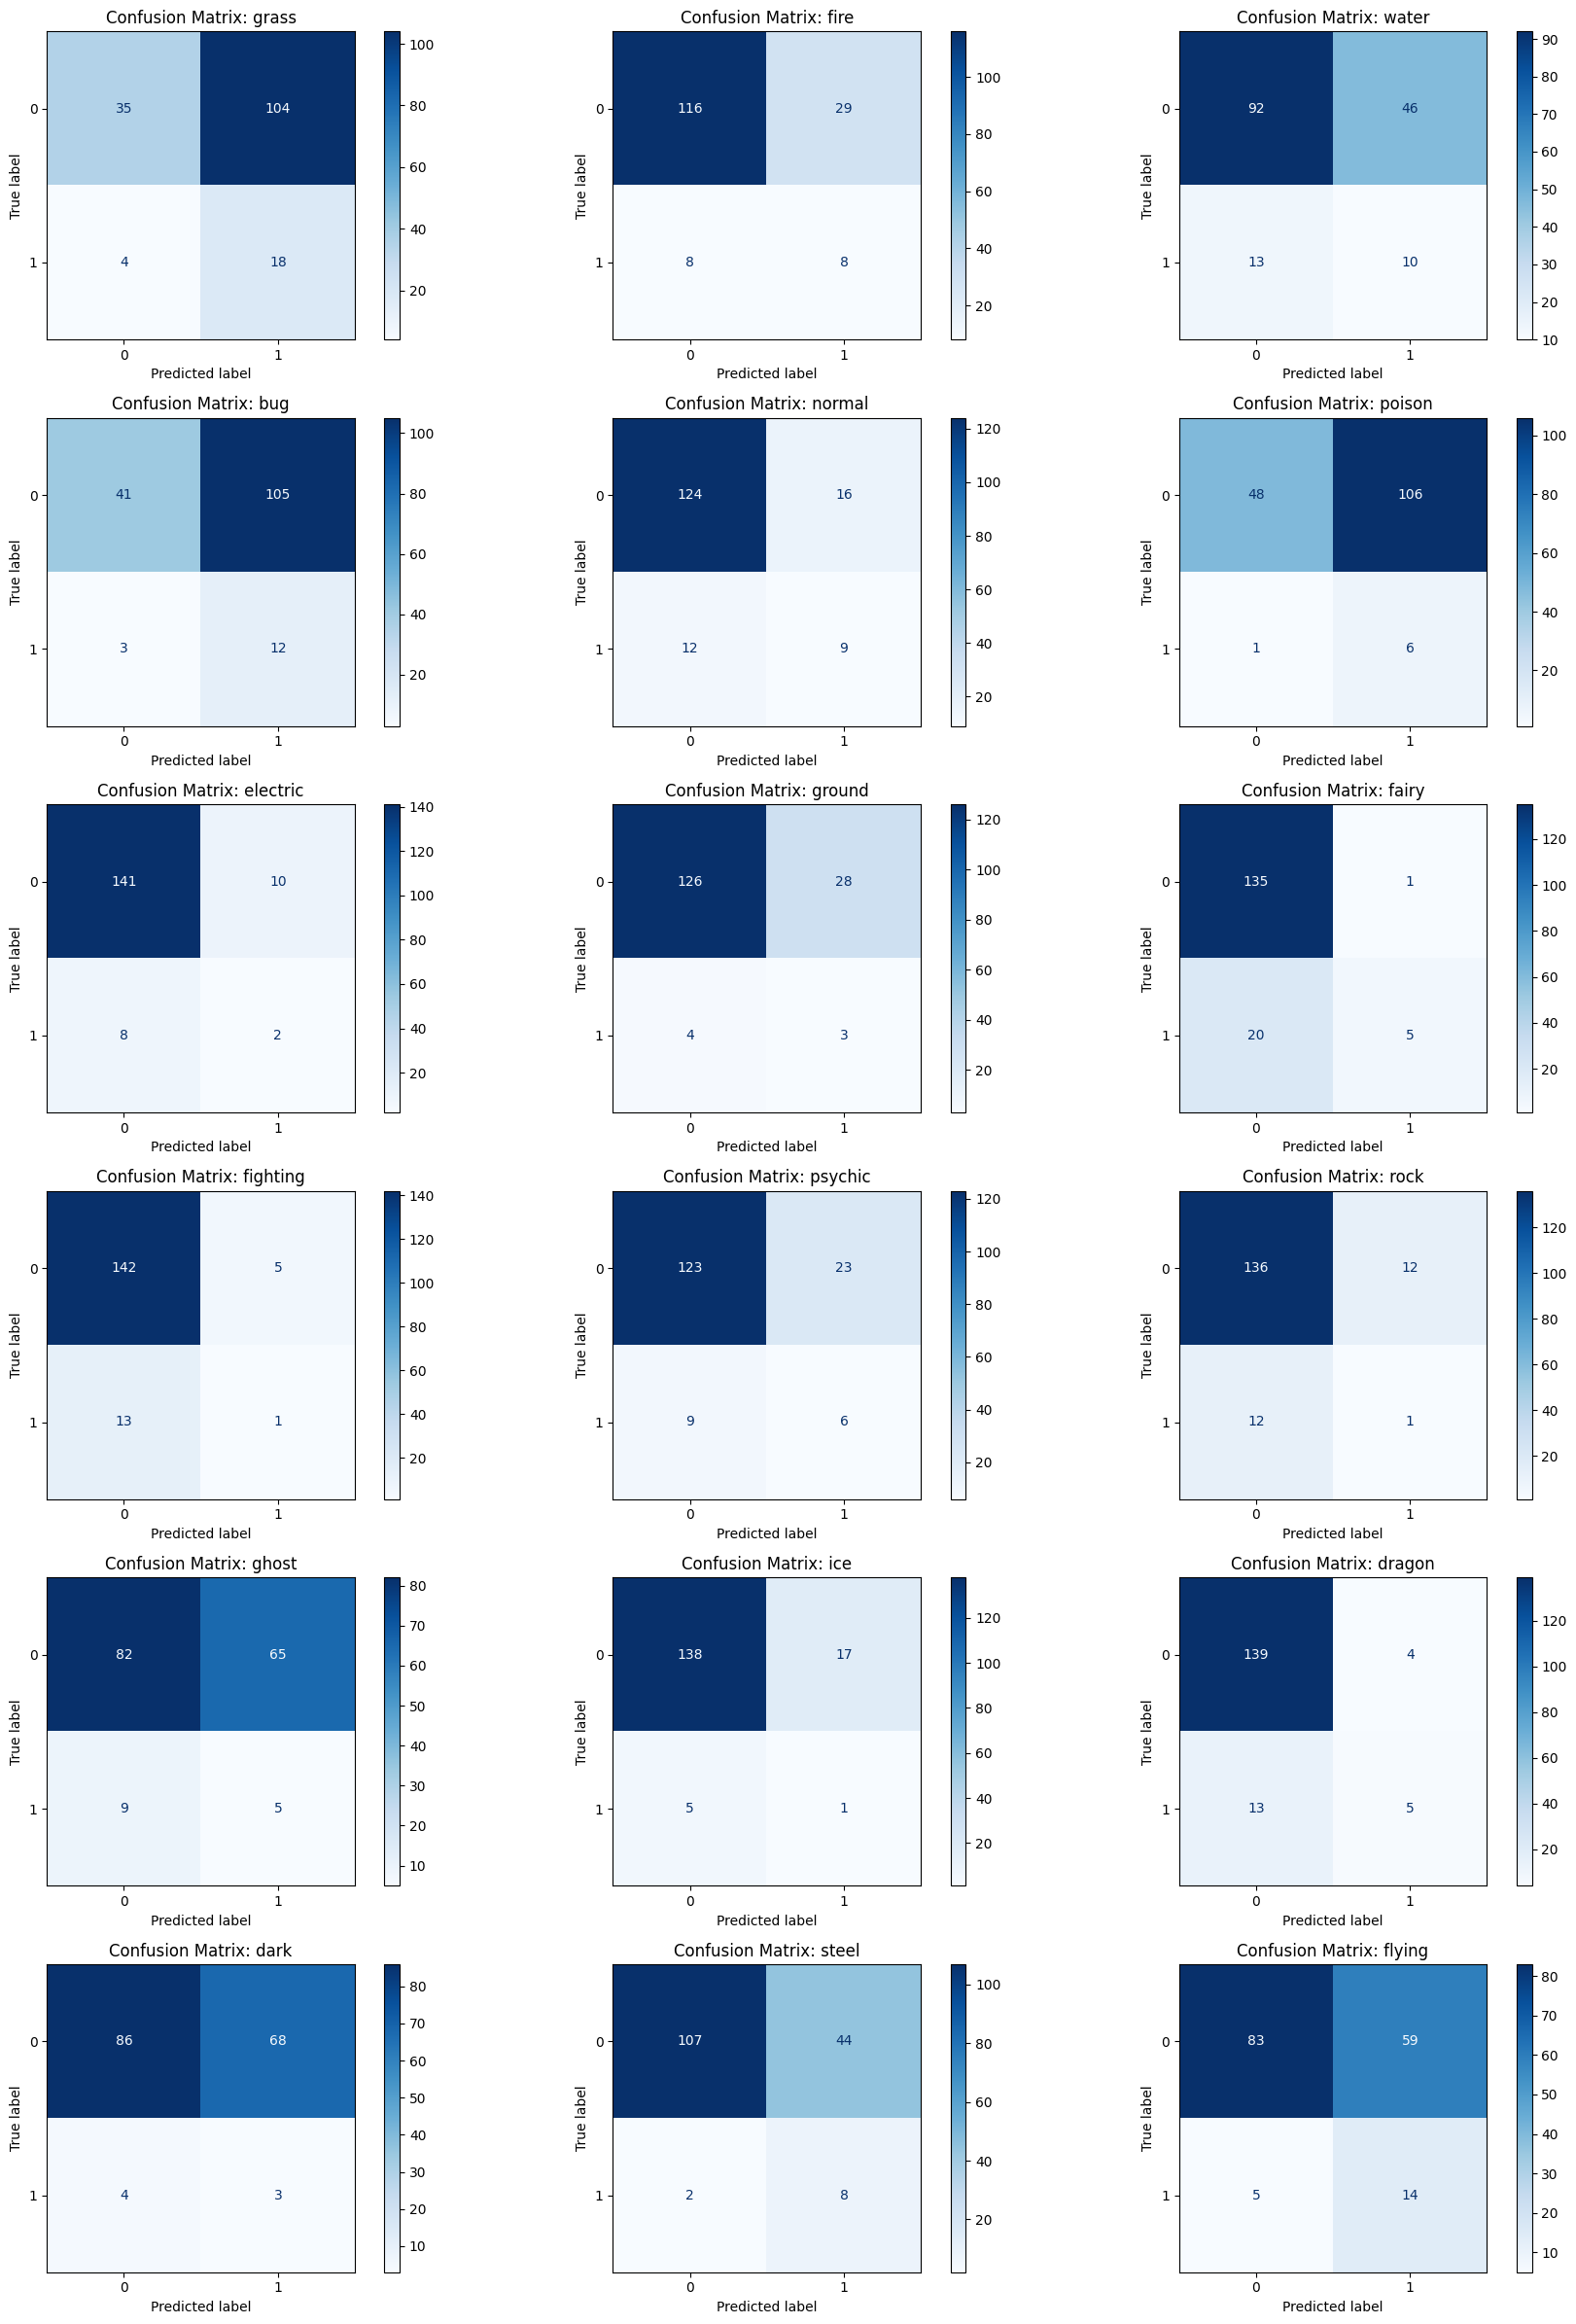

In [27]:
y_test_dict = {}
y_pred_dict = {}
results_by_type = {}

fig, axes = plt.subplots(6, 3, figsize=(18, 24))
axes = axes.flatten()

for t in types:
    y_test_dict[t] = split_Y(Y_test, target=t)
    y_pred_dict[t] = []
    for stats in X_test.values:
        pred = model_by_type[t].predict_proba([stats])[0][1]
        thr = threshold_by_type[t]
        y_pred_dict[t].append(1 if pred >= thr else 0)

for t, model in model_by_type.items():
    y_true = y_test_dict[t]
    y_pred = np.array(y_pred_dict[t])

    # metriques
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    ap = average_precision_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    f2 = fbeta_score(y_true, y_pred, beta=2)

    results_by_type[t] = {
        "accuracy": accuracy,
        "precision": precision,
        "recall": recall,
        "ap": ap,
        "f1": f1,
        "f2": f2
    }

    cm = confusion_matrix(y_true, y_pred)

    idx = types.index(t)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
    disp.plot(ax=axes[idx], cmap='Blues')
    axes[idx].set_title(f'Confusion Matrix: {t}')

plt.tight_layout()
plt.show()

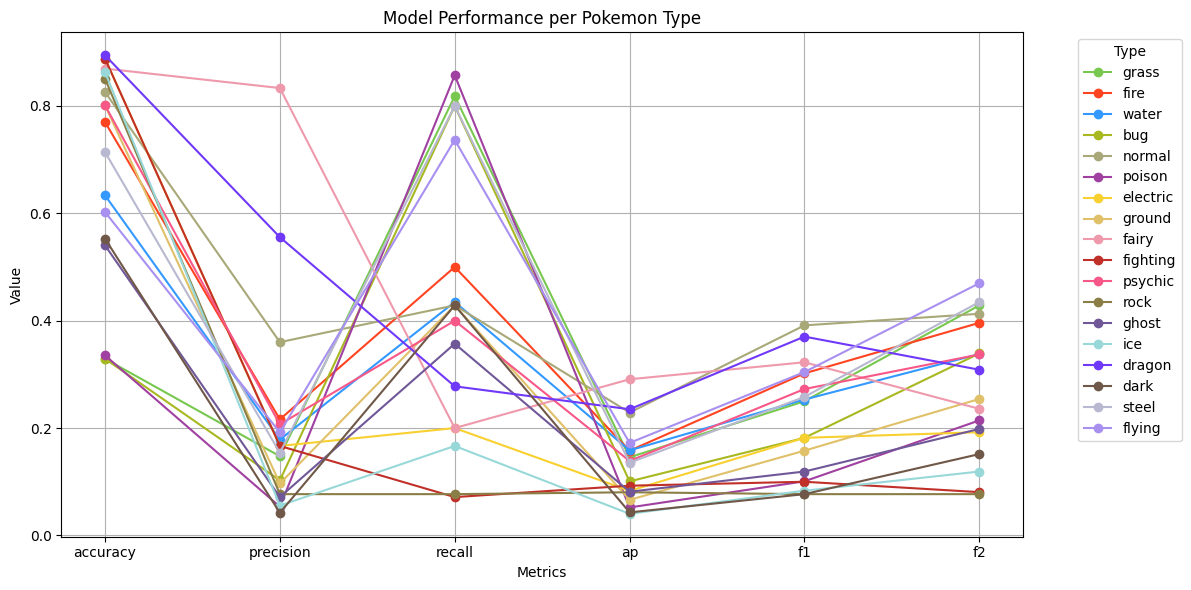

In [28]:
metrics = results_by_type[types[0]].keys()

plt.figure(figsize=(12, 6))

for t in results_by_type.keys():
    scores = [results_by_type[t][metric] for metric in metrics]
    plt.plot(metrics, scores, marker='o', label=t, color=type_color_dict[t])

plt.xlabel("Metrics")
plt.ylabel("Value")
plt.title("Model Performance per Pokemon Type")
plt.legend(title="Type", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

In [29]:
def softmax(x):
    e_x = np.exp(x - np.max(x))  # per estabilitat numèrica
    return e_x / e_x.sum(axis=0)

Per normalitzar les prediccions dels diferentx models hem utilitzat la funció softmax que és la que ens ha fet obtenir millors resultats. També haviem intentat normalitzar-les amb (prob-threshold)/(1-threshold)

In [30]:
from scipy.special import expit
class TypeOVA():
    def __init__(self, model_by_type: dict, threshold_by_type: dict):
        self.models = model_by_type
        self.thresholds = threshold_by_type
        self.types = list(model_by_type.keys())
    
    def fit(self, X, Y):
        for t in self.types:
            self.models[t].fit(X, split_Y(Y, target=t))
    
    def predict(self, stats):
        results = {}
        for t in self.types:
            model = self.models[t]
            if hasattr(model, "decision_function"):
                decision_scores = model.decision_function([stats])[0]
                results[t] = expit(decision_scores)
            else:
                probs = model.predict_proba([stats])[:, 1]
                results[t] = probs[0]

        return results
    
    def get_types(self, stats):
        probs = self.predict(stats).values()
        scores = softmax(list(probs))
        scores = {t: s for t, s in zip(self.types, scores)}
        
        candidates = [t for t,s in scores.items() if s >= 0]
        
        if len(candidates) >= 2:
            types =  sorted(candidates, key=lambda t: scores[t], reverse=True)[:2]
        elif len(candidates) == 1:
            types = sorted(candidates, key=lambda t: scores[t], reverse=True)[:1]
        else:
            # retorna el que te probabilitat més alta
            types = [max(candidates, key=scores.get)]
        
        return types

    def get_one_hot_types(self, types):
        return [1 if t in types else 0 for t in self.types]

    def get_accuracy(self, X, Y):
        acc1 = 0
        acc2 = 0

        for stats, _type in zip(X.values, Y.values):
            pred_types = self.get_one_hot_types(self.get_types(stats))
            real_types = _type.tolist()

            pred_idx = [i for i, val in enumerate(pred_types) if val == 1]
            real_idx = [i for i, val in enumerate(real_types) if val == 1]

            for i in pred_idx:
                if i in real_idx:
                    acc1 += 1
                    break
            
            if set(pred_idx) == set(real_idx):
                acc2 += 1
        
        return acc1 / len(X), acc2 / len(X)

    def get_type_success_rate(self, X, Y):
        success_by_type = {} # type: {correct: int, total: int}
        
        for t in self.types:
            success_by_type[t] = {"correct": 0, "total": 0}
        total = 0
        for stats, _type in zip(X.values, Y.values):
            pred_idx = [self.types[i] for i, val in enumerate(self.get_one_hot_types(self.get_types(stats))) if val == 1]
            real_idx = [self.types[i] for i, val in enumerate(_type.tolist()) if val == 1]
            total += 1
            for t in real_idx:
                success_by_type[t]["total"] += 1
                if t in pred_idx:
                    success_by_type[t]["correct"] += 1
        
        return total, success_by_type
    
    def get_pokemon_confusion_matrix(self, X, Y):
        confusion_matrix = np.zeros((len(self.types), len(self.types)), dtype=int)
        type_idx_dic = {t: i for i, t in enumerate(self.types)}
        for stats, _type in zip(X.values, Y.values):
            pred_idx = [self.types[i] for i, val in enumerate(self.get_one_hot_types(self.get_types(stats))) if val == 1]
            real_idx = [self.types[i] for i, val in enumerate(_type.tolist()) if val == 1]

            for rt in real_idx:
                if rt in pred_idx:
                    confusion_matrix[type_idx_dic[rt]][type_idx_dic[rt]] += 1
                else:
                    for pt in pred_idx:
                        confusion_matrix[type_idx_dic[rt]][type_idx_dic[pt]] += 1
        return  pd.DataFrame(confusion_matrix, index=self.types, columns=self.types)

In [31]:
ova = TypeOVA(model_by_type, threshold_by_type)
ova.fit(X_train_full, Y_train_full)
acc1_train, acc2_train = ova.get_accuracy(X_train_full, Y_train_full)
acc1_test, acc2_test = ova.get_accuracy(X_test, Y_test)

print(f"Train Accuracy Top-1: {acc1_train:.4f}, Top-2: {acc2_train:.4f}")
print(f"Test Accuracy Top-1: {acc1_test:.4f}, Top-2: {acc2_test:.4f}")

Train Accuracy Top-1: 0.3604, Top-2: 0.0499
Test Accuracy Top-1: 0.3106, Top-2: 0.0311


In [32]:
print("\nType-wise Success Rates:")
npokemons, success_by_type = ova.get_type_success_rate(X_test, Y_test)
for t, stats in success_by_type.items():
    total = stats["total"]
    correct = stats["correct"]
    rate = correct / total if total > 0 else 0
    print(f"{t}: {correct}/{total} ({rate:.4f})")

print(f"\nNumber of types predicted: {sum([stats['correct'] for stats in success_by_type.values()])}")
print(f"Number of possible predictions: {sum([stats['total'] for stats in success_by_type.values()])}")
print(f"Number of samples test: {npokemons}")


Type-wise Success Rates:
grass: 2/22 (0.0909)
fire: 0/16 (0.0000)
water: 0/23 (0.0000)
bug: 0/15 (0.0000)
normal: 15/21 (0.7143)
poison: 0/7 (0.0000)
electric: 0/10 (0.0000)
ground: 0/7 (0.0000)
fairy: 0/25 (0.0000)
fighting: 0/14 (0.0000)
psychic: 0/15 (0.0000)
rock: 6/13 (0.4615)
ghost: 0/14 (0.0000)
ice: 0/6 (0.0000)
dragon: 13/18 (0.7222)
dark: 0/7 (0.0000)
steel: 4/10 (0.4000)
flying: 15/19 (0.7895)

Number of types predicted: 55
Number of possible predictions: 262
Number of samples test: 161


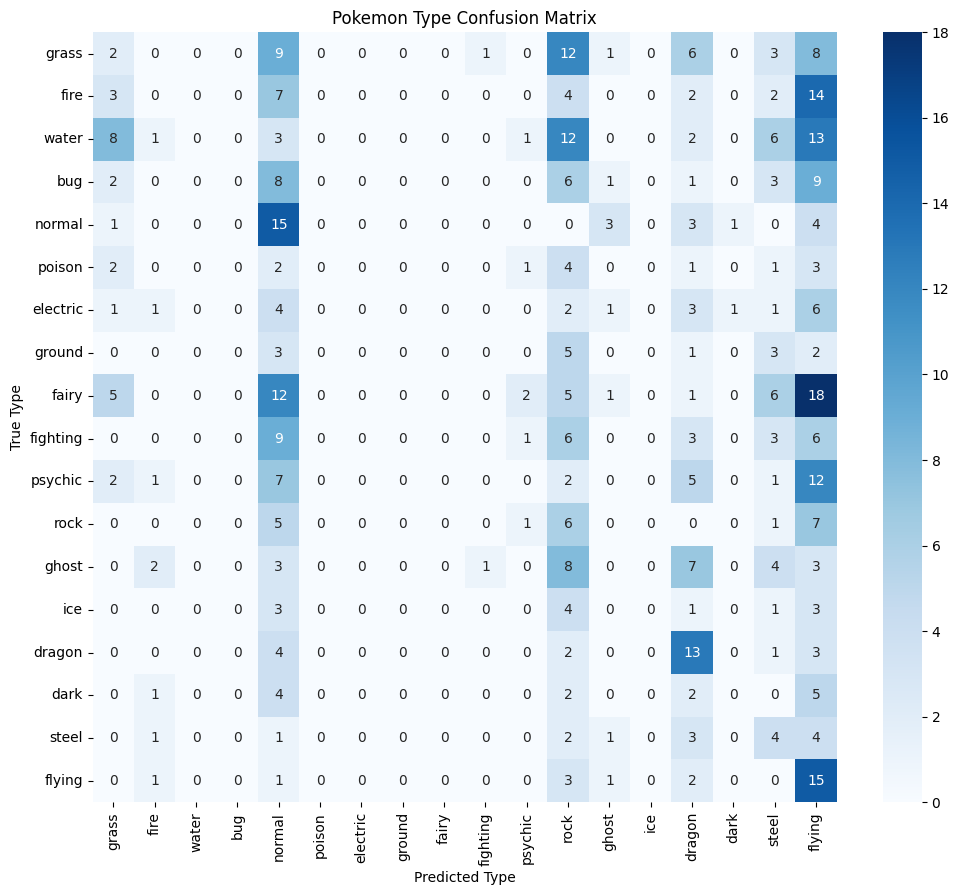

In [33]:
pokemon_confusion_matrix = ova.get_pokemon_confusion_matrix(X_test, Y_test)
plt.figure(figsize=(12, 10))
sns.heatmap(pokemon_confusion_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Pokemon Type Confusion Matrix')
plt.xlabel('Predicted Type')
plt.ylabel('True Type')
plt.show()

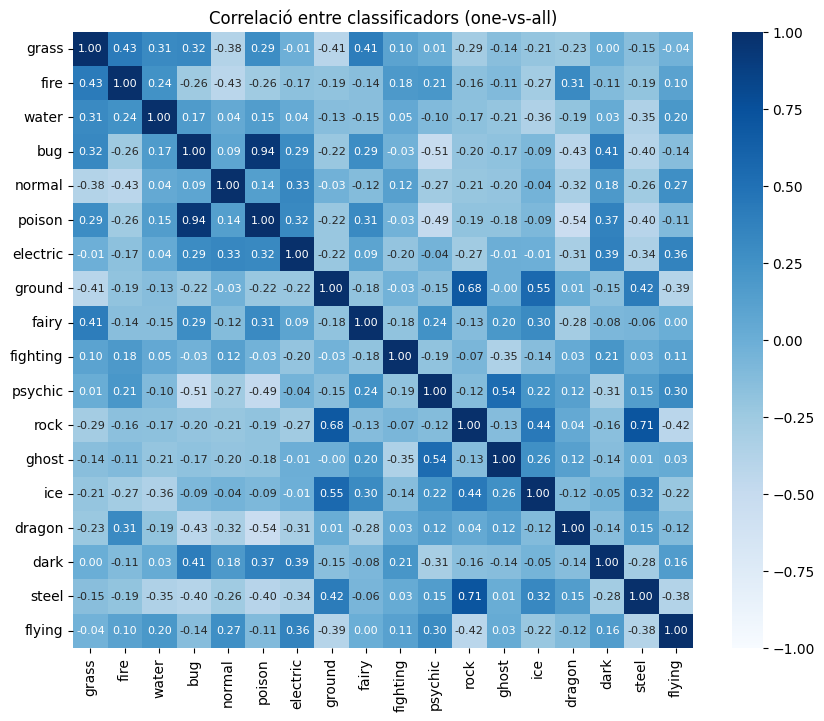

In [34]:
# correlacio entre classificadors
prob_df = pd.DataFrame()

for ptype, model in model_by_type.items():
    prob_df[ptype] = model.predict_proba(X_test)[:, 1]

corr_matrix = prob_df.corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap="Blues", fmt=".2f", annot_kws={"size": 8}, vmin=-1, vmax=1)
plt.title("Correlació entre classificadors (one-vs-all)")
plt.show()


Podem veure que els següents classificadors classifiquen de manera similar:
- poison i bug
- rock i ground (terrestres)
- rock i steel (forts?)
- ghost i psychic